Warming up --------------------------------------
              mpi no     1.000  i/100ms
              mpi x1     1.000  i/100ms
              mpi x2     1.000  i/100ms
              mpi x3     1.000  i/100ms
              mpi x4     1.000  i/100ms
              mpi x5     1.000  i/100ms
              mpi x6     1.000  i/100ms
              mpi x7     1.000  i/100ms
              mpi x8     1.000  i/100ms
Calculating -------------------------------------
              mpi no      0.256  (± 0.0%) i/s -      2.000  in   7.802058s
              mpi x1      0.264  (± 0.0%) i/s -      2.000  in   7.571911s
              mpi x2      0.458  (± 0.0%) i/s -      3.000  in   6.574939s
              mpi x3      0.664  (± 0.0%) i/s -      4.000  in   6.048550s
              mpi x4      0.895  (± 0.0%) i/s -      5.000  in   5.992848s
              mpi x5      0.789  (± 0.0%) i/s -      5.000  in   6.352104s
              mpi x6      0.792  (± 0.0%) i/s -      4.000 
              mpi x7      0.77

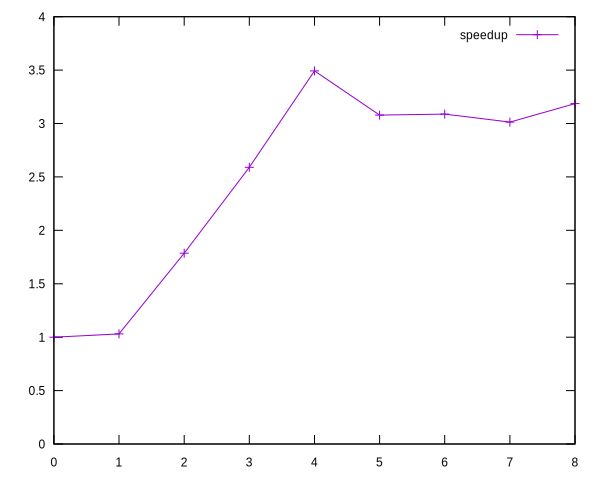

In [1]:
require 'gnuplot'
require 'fresh-mc'
require 'benchmark/ips'

L=1_000_000

def mpi n
  (proc{ s=L/size; ((s*rank+1)..(s*rank+s)).sum }*n).sum
  nil
end

def mpi_less
  (1..L).sum
  nil
end

bm=Benchmark.ips do |x|
  x.report("mpi no") { mpi_less }
  (1..8).each{|i| x.report("mpi x#{i}") { mpi i } }
  x.compare!
end

cpu   = (0..8).collect { |v| v.to_f }
ref   = bm.entries.first.stats.central_tendency
speed = bm.entries.map{|e| e.stats.central_tendency/ref }

Gnuplot::Plot.new do |gp| 
  gp.yrange "[0:4]"
  gp.data << Gnuplot::DataSet.new([cpu, speed]) do |ds| 
    ds.with = "linespoints"
    ds.title = "speedup"
  end
end